# Associative Memory Task Performance

Helpful links: <br>
    [Markdown for Jupyter Notebooks](https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed) <br>
    [Python Programming in Psychology](https://blog.efpsa.org/2016/07/12/python-programming-in-psychology-from-data-collection-to-analysis/)

In [1]:
import glob
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/Users/mcmahonmc/.pyenv/versions/3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
beh_dir = os.path.join('/Users/mcmahonmc/Box/CogNeuroLab/Aging Decision Making R01/data/mri/Behavioral')

## Get behavioral data files

In [115]:
learning_files = glob.glob(beh_dir + '/*/Memory/study*.txt')#, recursive = True)

In [116]:
learning_files

['/Users/mcmahonmc/Box/CogNeuroLab/Aging Decision Making R01/data/mri/Behavioral/30004/Memory/study_run1_30004_2_cs2.txt',
 '/Users/mcmahonmc/Box/CogNeuroLab/Aging Decision Making R01/data/mri/Behavioral/30008/Memory/study_run1_30008_ja.txt',
 '/Users/mcmahonmc/Box/CogNeuroLab/Aging Decision Making R01/data/mri/Behavioral/30009/Memory/study_run1_30009_2_ma.txt',
 '/Users/mcmahonmc/Box/CogNeuroLab/Aging Decision Making R01/data/mri/Behavioral/30012/Memory/study_run1_30012_2_br2.txt',
 '/Users/mcmahonmc/Box/CogNeuroLab/Aging Decision Making R01/data/mri/Behavioral/30015/Memory/study_run1_30015_lr.txt',
 '/Users/mcmahonmc/Box/CogNeuroLab/Aging Decision Making R01/data/mri/Behavioral/30019/Memory/study_run1_30019_vf.txt',
 '/Users/mcmahonmc/Box/CogNeuroLab/Aging Decision Making R01/data/mri/Behavioral/30020/Memory/study_run1_30020_jp.txt',
 '/Users/mcmahonmc/Box/CogNeuroLab/Aging Decision Making R01/data/mri/Behavioral/30023/Memory/study_run1_30023_js.txt',
 '/Users/mcmahonmc/Box/CogNeuroL

In [116]:
memmatch_files = glob.glob(beh_dir + '/**/Memory/match_run*.txt')#, recursive = True)

In [27]:
memrepeat_files = glob.glob(beh_dir + '/**/Memory/repeat_run*.mat)#', recursive = True)

## About the Memory Match Task

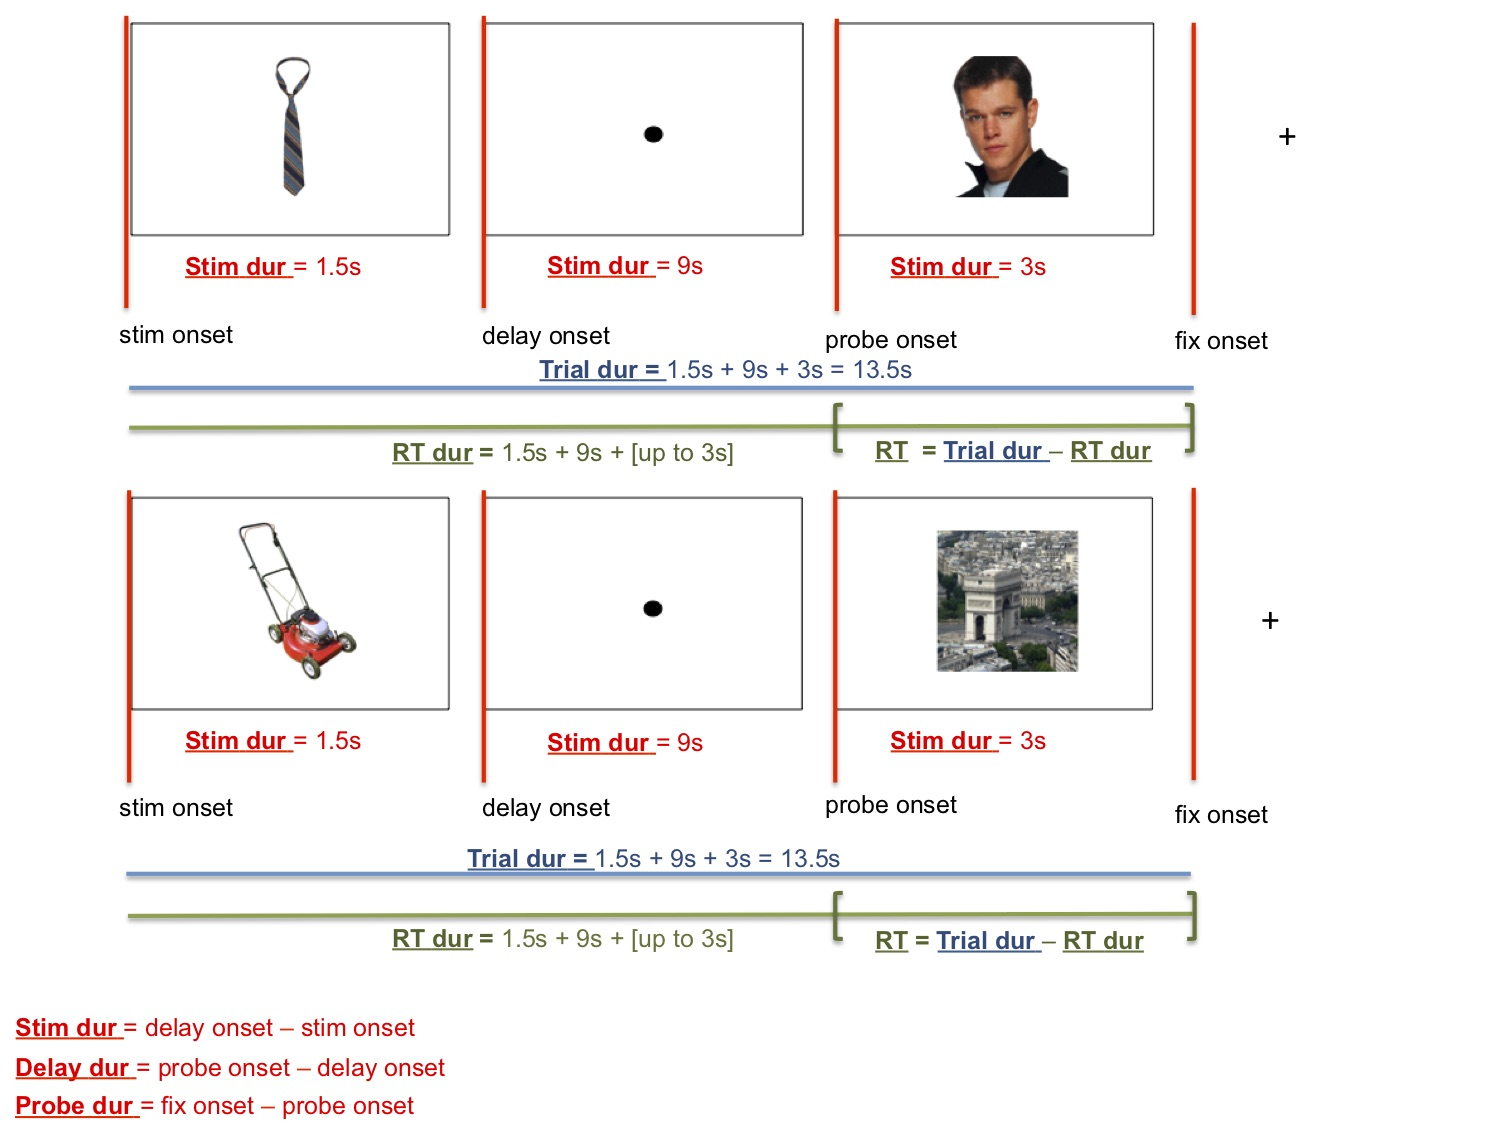

## Data Key

**Group** <br>
0 = Young Adults <br> 
1 = Older Adults

**Condition** <br>
1 = Face-Object Match <br>
2 = Face-Object Mismatch <br>
3 = Scene-Object Match <br>
4 = Scene-Object Mismatch 

**Face_Scene**
0 = Face
1 = Scene

## Aggregate data

In [118]:
df = pd.DataFrame()
for file in memmatch_files:
    
    partic = file.split('Behavioral/')[1]
    partic = int(partic[0:5])
    
    run = file.split('run')[1]
    run = run[:1]
    
    matfile = pd.read_csv(file, sep = '\t', na_values = ' NaN')
    matfile['record_id'] = partic
    matfile['run'] = run
    df = df.append(matfile)

df[' isCorrect'] = df[' isCorrect'].astype('float64')
df['RT_c'] = df[' RT'].where(df[' isCorrect'] == 1.0)
df['face_scene'] = np.where((df[' cond'] == 1) | (df[' cond'] == 2), 0, 1)
df['match_mismatch'] = np.where((df[' cond'] == 1) | (df[' cond'] == 3), 0, 1)
df['group'] = np.where(df['record_id'] < 40000, 0, 1)
df.columns = ['onset', 'pairType', 'fsStimID_probe', 'objStimID_cue', 'cond', 'duration', 'answer', 'resp', 'RT', 'isCorrect', 'record_id', 'run', 'RT_c', 'face_scene', 'match_mismatch', 'group']

In [119]:
df[35:40]

,onset,pairType,fsStimID_probe,objStimID_cue,cond,duration,answer,resp,RT,isCorrect,record_id,run,RT_c,face_scene,match_mismatch,group
11,217.5,1,5,21,2,16.5,0,2.0,11076.0,1.0,30004,3,11076.0,0,1,0
0,1.5,2,16,20,4,16.5,0,1.0,11452.0,0.0,30008,1,NaN,1,1,0
1,19.5,1,1,28,1,16.5,1,1.0,11650.0,1.0,30008,1,11650.0,0,0,0
2,37.5,1,2,6,1,16.5,1,1.0,11577.0,1.0,30008,1,11577.0,0,0,0
3,55.5,1,6,4,1,16.5,1,1.0,11436.0,1.0,30008,1,11436.0,0,0,0


In [120]:
df.to_csv('/Users/mcmahonmc/Box/CogNeuroLab/Aging Decision Making R01/Data/memmatch_results.csv')

### Excluding participants with < 55% accuracy

In [121]:
datacheck = df.groupby(['record_id']).mean()
below_acc = datacheck[datacheck['isCorrect'] < 0.55]
exclude = below_acc.index
df_old = df
df = df_old[~df_old['record_id'].isin(exclude)]

In [122]:
print('**Total Participants Excluded**')
print('Excluded %d Young Adults' %(sum(exclude < 40000)))
print('Excluded %d Older Adults' %(sum(exclude >= 40000)))

**Total Participants Excluded**
Excluded 2 Young Adults
Excluded 11 Older Adults


In [123]:
below_acc

,onset,duration,resp,RT,isCorrect,RT_c,face_scene,match_mismatch,group
record_id,,,,,,,,,
30118,108.875000,16.5,1.285714,11795.214286,0.305556,11669.272727,0.500000,0.500000,0.0
30588,107.750000,16.5,1.545455,11585.000000,0.305556,11585.000000,0.500000,0.500000,0.0
40500,109.625000,16.5,1.343750,11591.968750,0.527778,11437.315789,0.500000,0.500000,1.0
40520,107.166667,16.5,1.545455,12159.090909,0.277778,12055.200000,0.500000,0.500000,1.0
40619,108.125000,16.5,1.545455,11732.272727,0.305556,11732.272727,0.500000,0.500000,1.0
40623,108.500000,16.5,NaN,NaN,0.000000,NaN,0.500000,0.500000,1.0
40707,109.166667,16.5,1.350000,12721.150000,0.277778,12653.500000,0.500000,0.500000,1.0
40738,109.958333,16.5,1.571429,11568.642857,0.222222,11379.000000,0.500000,0.500000,1.0
40796,109.125000,16.5,1.333333,11762.333333,0.472222,11737.647059,0.500000,0.500000,1.0


## Accuracy

In [132]:
df_match_mismatch = df.drop(['onset', 'duration', 'resp', 'face_scene', 'group'], axis = 1).groupby(['record_id', 'match_mismatch']).mean()
df_face_scene = df.drop(['onset', 'duration', 'resp', 'match_mismatch', 'group'], axis = 1).groupby(['record_id', 'face_scene']).mean()
df_cond = df.drop(['onset', 'duration', 'resp', 'face_scene', 'match_mismatch', 'group'], axis = 1).groupby(['record_id', 'cond']).mean()
df_cond.to_csv('/Users/mcmahonmc/Box/CogNeuroLab/Aging Decision Making R01/Data/memmatch_results_by_cond.csv')

In [33]:
data = df.groupby(['record_id', 'cond']).mean()
data.reset_index(level=['cond'], inplace=True)

grouped_data= data.groupby(['cond', 'group'])
pd.DataFrame(grouped_data['isCorrect'].describe().unstack().transpose())

cond                 1          2          3          4
      group                                            
count 0      52.000000  52.000000  52.000000  52.000000
      1      54.000000  54.000000  54.000000  54.000000
mean  0       0.919231   0.881258   0.912393   0.880342
      1       0.854218   0.817901   0.855967   0.802881
std   0       0.107526   0.172009   0.115043   0.165897
      1       0.157183   0.195577   0.140926   0.170831
min   0       0.555556   0.222222   0.555556   0.333333
      1       0.222222   0.000000   0.555556   0.333333
25%   0       0.888889   0.777778   0.888889   0.861111
      1       0.777778   0.694444   0.777778   0.694444
50%   0       1.000000   1.000000   1.000000   1.000000
      1       0.888889   0.888889   0.888889   0.788889
75%   0       1.000000   1.000000   1.000000   1.000000
      1       1.000000   1.000000   1.000000   0.888889
max   0       1.000000   1.000000   1.000000   1.000000
      1       1.000000   1.000000   1.000000   1.000000

Text(0.5, 1.0, 'Accuracy')

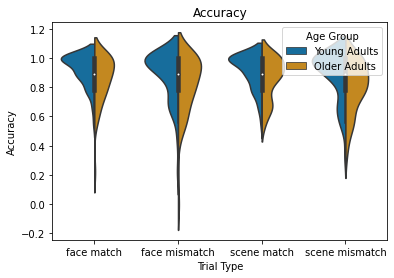

In [34]:
g = sns.violinplot(x='cond', y='isCorrect', hue='group', palette='colorblind', split=True, data=data)
g.set_xticklabels(['face match','face mismatch','scene match', 'scene mismatch'])
g.legend(title= 'Age Group',loc='upper right')
new_labels = ['Young Adults', 'Older Adults']
for t, l in zip(g.legend_.texts, new_labels): t.set_text(l)
g.set(xlabel='Trial Type', ylabel='Accuracy')
g.set_title('Accuracy')

## Response Time

In [35]:
pd.DataFrame(grouped_data['RT_c'].describe().unstack().transpose())

cond                    1             2             3             4
      group                                                        
count 0         52.000000     52.000000     52.000000     52.000000
      1         54.000000     53.000000     54.000000     54.000000
mean  0      11435.413347  11441.036126  11485.154747  11522.565827
      1      11663.060009  11768.712781  11776.071046  11897.593665
std   0        228.135845    232.746992    242.592875    261.974768
      1        316.087521    238.814810    302.444185    279.887391
min   0      11009.500000  10979.888889  11059.250000  11020.666667
      1      11100.888889  11317.000000  11228.285714  11401.222222
25%   0      11267.166667  11257.166667  11319.527778  11366.510417
      1      11485.833333  11593.000000  11559.577778  11694.277778
50%   0      11417.125000  11413.166667  11469.604167  11459.000000
      1      11612.562500  11753.000000  11807.111111  11840.128571
75%   0      11565.419643  11547.805556  11597.714286  11634.125000
      1      11816.821429  11918.750000  11984.000000  12087.471429
max   0      11949.750000  12196.250000  12232.400000  12364.000000
      1      12693.200000  12419.600000  12446.000000  12543.000000

Text(0.5, 1.0, 'Response Time')

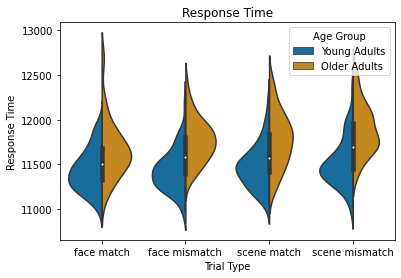

In [36]:
g = sns.violinplot(x='cond', y='RT_c', hue='group', palette='colorblind', split=True, data=data)
g.set_xticklabels(['face match','face mismatch','scene match', 'scene mismatch'])
g.legend(title= 'Age Group',loc='upper right')
new_labels = ['Young Adults', 'Older Adults']
for t, l in zip(g.legend_.texts, new_labels): t.set_text(l)
g.set(xlabel='Trial Type', ylabel='Response Time')
g.set_title('Response Time')

For quick tips, see [Basic Stats in pandas Dataframes](https://medium.com/@kasiarachuta/basic-statistics-in-pandas-dataframe-594208074f85)

Two-way ANOVA code obtained from [Anova in Python](https://plot.ly/python/v3/anova/)

In [37]:
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'isCorrect ~ C(group) + C(cond) + C(group):C(cond)'
model = ols(formula, data).fit()
aov_table = statsmodels.stats.anova.anova_lm(model, typ=2)
print(aov_table)

ModuleNotFoundError: No module named 'statsmodels'

## Performance over time

Text(0.5, 1.0, 'Accuracy across Multiple Runs')

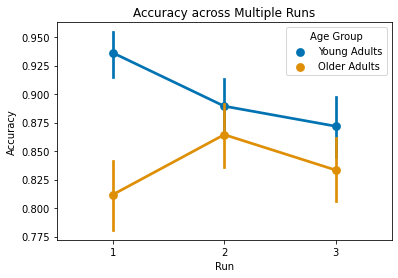

In [38]:
g = sns.pointplot(x='run', y='isCorrect', hue='group', palette='colorblind', data=df)
g.legend(title= 'Age Group',loc='upper right')
new_labels = ['Young Adults', 'Older Adults']
for t, l in zip(g.legend_.texts, new_labels): t.set_text(l)
g.set(xlabel='Run', ylabel='Accuracy')
g.set_title('Accuracy across Multiple Runs')

Text(0.5, 1.0, 'Response Time across Multiple Runs')

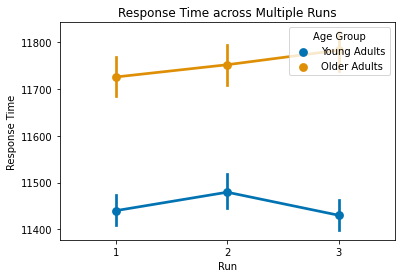

In [39]:
g = sns.pointplot(x='run', y='RT_c', hue='group', palette='colorblind', data=df)
g.legend(title= 'Age Group',loc='upper right')
new_labels = ['Young Adults', 'Older Adults']
for t, l in zip(g.legend_.texts, new_labels): t.set_text(l)
g.set(xlabel='Run', ylabel='Response Time')
g.set_title('Response Time across Multiple Runs')

Text(0.5, 1.0, 'Young Adults \n Response Time across Multiple Runs')

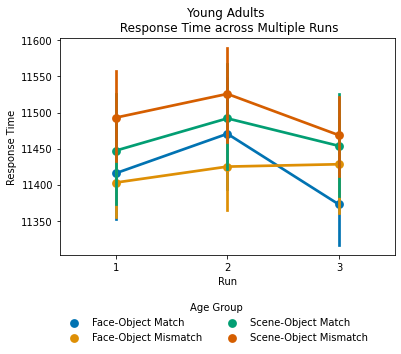

In [40]:
g = sns.pointplot(x='run', y='RT_c', hue='cond', palette='colorblind', data=df[df['group'] == 0])
g.legend(title= 'Age Group',loc='upper left', bbox_to_anchor= (0.0, -0.20), ncol=2, borderaxespad=0, frameon=False)
new_labels = ['Face-Object Match', 'Face-Object Mismatch', 'Scene-Object Match', 'Scene-Object Mismatch']
for t, l in zip(g.legend_.texts, new_labels): t.set_text(l)
g.set(xlabel='Run', ylabel='Response Time')
g.set_title('Young Adults \n Response Time across Multiple Runs')

Text(0.5, 1.0, 'Older Adults \n Response Time across Multiple Runs')

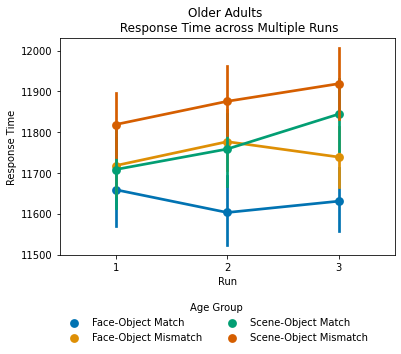

In [41]:
g = sns.pointplot(x='run', y='RT_c', hue='cond', palette='colorblind', data=df[df['group'] == 1])
g.legend(title= 'Age Group',loc='upper left', bbox_to_anchor= (0.0, -0.20), ncol=2, borderaxespad=0, frameon=False)
new_labels = ['Face-Object Match', 'Face-Object Mismatch', 'Scene-Object Match', 'Scene-Object Mismatch']
for t, l in zip(g.legend_.texts, new_labels): t.set_text(l)
g.set(xlabel='Run', ylabel='Response Time')
g.set_title('Older Adults \n Response Time across Multiple Runs')

## Trial Analysis

In [67]:
df[df['fsStimID_probe'] == 1]

,onset,pairType,fsStimID_probe,objStimID_cue,cond,duration,answer,resp,RT,isCorrect,record_id,run,RT_c,face_scene,group
2,40.5,1,1,15,2,16.5,0,2.0,11341.0,1.0,30004,1,11341.0,0,0
4,79.5,2,1,29,3,16.5,1,1.0,11442.0,1.0,30004,1,11442.0,1,0
1,19.5,1,1,28,1,16.5,1,1.0,11650.0,1.0,30008,1,11650.0,0,0
10,196.5,2,1,18,4,16.5,0,2.0,12086.0,1.0,30008,2,12086.0,1,0
8,156.0,1,1,14,2,16.5,0,2.0,11313.0,1.0,30009,2,11313.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,81.0,2,1,17,3,16.5,1,1.0,11876.0,1.0,40878,2,11876.0,1,1
6,120.0,1,1,21,2,16.5,0,1.0,11732.0,0.0,40930,3,NaN,0,1
10,195.0,2,1,29,3,16.5,1,1.0,11534.0,1.0,40930,3,11534.0,1,1
11,214.5,2,1,27,3,16.5,1,1.0,11974.0,1.0,40968,1,11974.0,1,1


In [68]:
df[df['objStimID_cue'] == 1]

,onset,pairType,fsStimID_probe,objStimID_cue,cond,duration,answer,resp,RT,isCorrect,record_id,run,RT_c,face_scene,group
8,159.0,2,3,1,4,16.5,0,2.0,11247.0,1.0,30004,1,11247.0,1,0
8,154.5,1,11,1,1,16.5,1,1.0,11969.0,1.0,30008,1,11969.0,0,0
5,96.0,2,7,1,4,16.5,0,2.0,11301.0,1.0,30009,2,11301.0,1,0
3,58.5,2,9,1,3,16.5,1,2.0,11876.0,0.0,30012,1,NaN,1,0
7,135.0,1,10,1,2,16.5,0,2.0,11261.0,1.0,30015,1,11261.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,78.0,1,7,1,1,16.5,1,1.0,11494.0,1.0,40859,1,11494.0,0,1
4,79.5,1,1,1,2,16.5,0,2.0,11686.0,1.0,40876,3,11686.0,0,1
1,19.5,2,11,1,3,16.5,1,1.0,12177.0,1.0,40878,1,12177.0,1,1
4,78.0,1,5,1,1,16.5,1,1.0,11204.0,1.0,40930,2,11204.0,0,1


In [45]:
dftrial = df.groupby(['record_id', 'fsStimID_probe']).count()
dftrial

onset  pairType  objStimID_cue  cond  duration  \
record_id fsStimID_probe                                                   
30004     1                   2         2              2     2         2   
          2                   2         2              2     2         2   
          3                   2         2              2     2         2   
          4                   2         2              2     2         2   
          5                   2         2              2     2         2   
...                         ...       ...            ...   ...       ...   
40968     14                  2         2              2     2         2   
          15                  2         2              2     2         2   
          16                  2         2              2     2         2   
          17                  2         2              2     2         2   
          18                  2         2              2     2         2   

                          answer  resp  RT  isCorrect  run  RT_c  face_scene  \
record_id fsStimID_probe                                                       
30004     1                    2     2   2          2    2     2           2   
          2                    2     2   2          2    2     2           2   
          3                    2     2   2          2    2     2           2   
          4                    2     2   2          2    2     2           2   
          5                    2     2   2          2    2     2           2   
...                          ...   ...  ..        ...  ...   ...         ...   
40968     14                   2     2   2          2    2     2           2   
          15                   2     1   1          2    2     1           2   
          16                   2     2   2          2    2     2           2   
          17                   2     2   2          2    2     2           2   
          18                   2     2   2          2    2     1           2   

                          group  
record_id fsStimID_probe         
30004     1                   2  
          2                   2  
          3                   2  
          4                   2  
          5                   2  
...                         ...  
40968     14                  2  
          15                  2  
          16                  2  
          17                  2  
          18                  2  

[1898 rows x 13 columns]

In [60]:
dftrial = df.groupby(['record_id', 'fsStimID_probe'])['isCorrect'].mean()
dftrial

record_id  fsStimID_probe
30004      1                 1.0
           2                 1.0
           3                 1.0
           4                 1.0
           5                 1.0
                            ... 
40968      14                1.0
           15                0.5
           16                1.0
           17                1.0
           18                0.5
Name: isCorrect, Length: 1898, dtype: float64

<AxesSubplot:xlabel='objStimID_cue'>

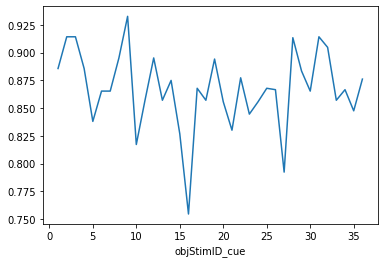

In [64]:
df.groupby(['objStimID_cue'])['isCorrect'].mean().plot()

<AxesSubplot:xlabel='fsStimID_probe'>

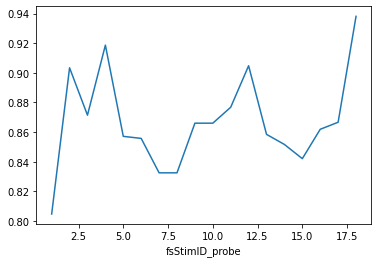

In [63]:
df.groupby(['fsStimID_probe'])['isCorrect'].mean().plot()

## Learning 

face_scene variable: face=0, scene=1

In [117]:
study = pd.DataFrame()
for file in learning_files:
    
    partic = file.split('Behavioral/')[1]
    partic = int(partic[0:5])
    
    run = file.split('run')[1]
    run = run[:1]
    
    matfile = pd.read_csv(file, sep = '\t', na_values = ' NaN')
    matfile['record_id'] = partic
    matfile['run'] = run
    study = study.append(matfile)

study[' isCorrect'] = study[' isCorrect'].astype('float64')
study['RT_c'] = study[' RT'].where(study[' isCorrect'] == 1.0)
study['face_scene'] = np.where((study[' pairType'] == 1), 0, 1)
study['group'] = np.where(study['record_id'] < 40000, 0, 1)
study.columns = ['trialNr', 'pairType', 'fsStimID', 'objStimID', 'targetPos', 'resp', 'RT', 'isCorrect', 'record_id', 'run', 'RT_c', 'face_scene', 'group']


In [118]:
study['phase'] = 'learning'
df['phase'] = 'test'

<ipython-input-118-ab3a8a828845>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['phase'] = 'test'


In [119]:
dfnew = df.append(study)

In [120]:
dfnew.to_csv('/Users/mcmahonmc/Box/CogNeuroLab/Aging Decision Making R01/Data/memmatch_learning_results.csv')

In [121]:
study

,trialNr,pairType,fsStimID,objStimID,targetPos,resp,RT,isCorrect,record_id,run,RT_c,face_scene,group,phase
0,1,2,7,15,3,3,1830,1.0,30004,1,1830.0,1,0,learning
1,2,2,29,1,2,2,2284,1.0,30004,1,2284.0,1,0,learning
2,3,1,5,15,2,2,1332,1.0,30004,1,1332.0,0,0,learning
3,4,1,30,7,2,2,1127,1.0,30004,1,1127.0,0,0,learning
4,5,1,21,5,2,2,695,1.0,30004,1,695.0,0,0,learning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,32,1,2,7,1,1,2426,1.0,40968,1,2426.0,0,1,learning
32,33,1,16,11,1,1,2038,1.0,40968,1,2038.0,0,1,learning
33,34,1,29,13,3,3,1524,1.0,40968,1,1524.0,0,1,learning
34,35,2,11,12,1,1,3703,1.0,40968,1,3703.0,1,1,learning


In [122]:
study.groupby(['record_id', 'objStimID']).count()

trialNr  pairType  fsStimID  targetPos  resp  RT  \
record_id objStimID                                                     
30004     1                2         2         2          2     2   2   
          2                2         2         2          2     2   2   
          3                2         2         2          2     2   2   
          4                2         2         2          2     2   2   
          5                2         2         2          2     2   2   
...                      ...       ...       ...        ...   ...  ..   
40968     14               2         2         2          2     2   2   
          15               2         2         2          2     2   2   
          16               2         2         2          2     2   2   
          17               2         2         2          2     2   2   
          18               2         2         2          2     2   2   

                     isCorrect  run  RT_c  face_scene  group  phase  
record_id objStimID                                                  
30004     1                  2    2     2           2      2      2  
          2                  2    2     2           2      2      2  
          3                  2    2     2           2      2      2  
          4                  2    2     2           2      2      2  
          5                  2    2     2           2      2      2  
...                        ...  ...   ...         ...    ...    ...  
40968     14                 2    2     1           2      2      2  
          15                 2    2     2           2      2      2  
          16                 2    2     2           2      2      2  
          17                 2    2     2           2      2      2  
          18                 2    2     2           2      2      2  

[2142 rows x 12 columns]

In [123]:
study[study['objStimID'] == 1]

,trialNr,pairType,fsStimID,objStimID,targetPos,resp,RT,isCorrect,record_id,run,RT_c,face_scene,group,phase
1,2,2,29,1,2,2,2284,1.0,30004,1,2284.0,1,0,learning
29,30,1,15,1,2,2,1357,1.0,30004,1,1357.0,0,0,learning
9,10,2,18,1,1,1,2791,1.0,30008,1,2791.0,1,0,learning
25,26,1,28,1,1,2,1664,0.0,30008,1,NaN,0,0,learning
15,16,2,6,1,1,1,1624,1.0,30009,1,1624.0,1,0,learning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,31,1,21,1,1,1,2875,1.0,40930,1,2875.0,0,1,learning
5,6,2,21,1,2,2,3663,1.0,40961,1,3663.0,1,1,learning
33,34,1,7,1,3,2,2444,0.0,40961,1,NaN,0,1,learning
18,19,2,27,1,2,2,5287,1.0,40968,1,5287.0,1,1,learning


So, every subject learns to pair both a face and a scene with a given object. They are tested on each association twice? across the 3 runs where one test is a match and one is a non-match. The pairs are different for each subject.

Can see whether subjects differ on place vs face retrieval for every given object? But not actual item

<AxesSubplot:xlabel='objStimID'>

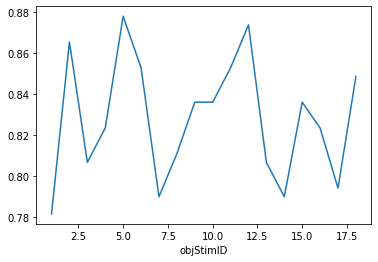

In [124]:
study.groupby(['objStimID'])['isCorrect'].mean().plot()

In [125]:
dfnew.groupby(['phase', 'record_id'])['isCorrect', 'RT', 'RT_c'].agg(['mean', 'std']).to_csv('/Users/mcmahonmc/Box/CogNeuroLab/Aging Decision Making R01/Data/memmatch_learning_results_mean.csv')

<ipython-input-125-ede0f5d5518a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfnew.groupby(['phase', 'record_id'])['isCorrect', 'RT', 'RT_c'].agg(['mean', 'std']).to_csv('/Users/mcmahonmc/Box/CogNeuroLab/Aging Decision Making R01/Data/memmatch_learning_results_mean.csv')


In [126]:
dfnew[dfnew['run'] == str(1)].groupby(['phase', 'record_id'])['isCorrect', 'RT', 'RT_c'].agg(['mean', 'std']).to_csv('/Users/mcmahonmc/Box/CogNeuroLab/Aging Decision Making R01/Data/memmatch_learning_results_run1_mean.csv')

<ipython-input-126-eecfa79ad8ef>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfnew[dfnew['run'] == str(1)].groupby(['phase', 'record_id'])['isCorrect', 'RT', 'RT_c'].agg(['mean', 'std']).to_csv('/Users/mcmahonmc/Box/CogNeuroLab/Aging Decision Making R01/Data/memmatch_learning_results_run1_mean.csv')


In [127]:
study[study['record_id'] > 40000].groupby('record_id').count()

,trialNr,pairType,fsStimID,objStimID,targetPos,resp,RT,isCorrect,run,RT_c,face_scene,group,phase
record_id,,,,,,,,,,,,,
40160,36,36,36,36,36,36,36,36,36,30,36,36,36
40170,36,36,36,36,36,36,36,36,36,34,36,36,36
40288,36,36,36,36,36,36,36,36,36,31,36,36,36
40351,36,36,36,36,36,36,36,36,36,31,36,36,36
40490,36,36,36,36,36,36,36,36,36,29,36,36,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,36,36,36,36,36,36,36,36,36,35,36,36,36
40878,36,36,36,36,36,36,36,36,36,28,36,36,36
40930,36,36,36,36,36,36,36,36,36,29,36,36,36


In [140]:
dfnew.groupby(['phase', 'record_id', 'face_scene'])['isCorrect', 'RT', 'RT_c'].agg(['mean', 'std']).reset_index().to_csv('/Users/mcmahonmc/Box/CogNeuroLab/Aging Decision Making R01/Data/memmatch_learning_face-scene_results_mean.csv')

<ipython-input-140-2a60b25b2ff2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfnew.groupby(['phase', 'record_id', 'face_scene'])['isCorrect', 'RT', 'RT_c'].agg(['mean', 'std']).reset_index().to_csv('/Users/mcmahonmc/Box/CogNeuroLab/Aging Decision Making R01/Data/memmatch_learning_face-scene_results_mean.csv')


In [141]:
dfnew.groupby(['phase', 'record_id', 'face_scene'])['isCorrect', 'RT', 'RT_c'].agg(['mean', 'std']).reset_index()[3:6]

<ipython-input-141-c9296586dfd0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfnew.groupby(['phase', 'record_id', 'face_scene'])['isCorrect', 'RT', 'RT_c'].agg(['mean', 'std']).reset_index()[3:6]


phase record_id face_scene isCorrect                     RT              \
                                      mean       std         mean         std   
3  learning     30008          1  0.944444  0.235702  1844.777778  671.742296   
4  learning     30009          0  1.000000  0.000000  1393.388889  588.614139   
5  learning     30009          1  0.944444  0.235702  1744.000000  399.041204   

          RT_c              
          mean         std  
3  1826.294118  687.681682  
4  1393.388889  588.614139  
5  1741.588235  411.187010

In [3]:
repeat_files = glob.glob(beh_dir + '/*/Memory/repeat_run*.mat')#, recursive = True)

In [4]:
repeat_files

['/Users/mcmahonmc/Box/CogNeuroLab/Aging Decision Making R01/data/mri/Behavioral/30004/Memory/repeat_run1_30004_2_cs2.mat',
 '/Users/mcmahonmc/Box/CogNeuroLab/Aging Decision Making R01/data/mri/Behavioral/30004/Memory/repeat_run2_30004_2_cs2.mat',
 '/Users/mcmahonmc/Box/CogNeuroLab/Aging Decision Making R01/data/mri/Behavioral/30004/Memory/repeat_run3_30004_2_cs2.mat',
 '/Users/mcmahonmc/Box/CogNeuroLab/Aging Decision Making R01/data/mri/Behavioral/30008/Memory/repeat_run1_30008_ja.mat',
 '/Users/mcmahonmc/Box/CogNeuroLab/Aging Decision Making R01/data/mri/Behavioral/30008/Memory/repeat_run2_30008_ja.mat',
 '/Users/mcmahonmc/Box/CogNeuroLab/Aging Decision Making R01/data/mri/Behavioral/30008/Memory/repeat_run3_30008_ja.mat',
 '/Users/mcmahonmc/Box/CogNeuroLab/Aging Decision Making R01/data/mri/Behavioral/30009/Memory/repeat_run1_30009_2_ma.mat',
 '/Users/mcmahonmc/Box/CogNeuroLab/Aging Decision Making R01/data/mri/Behavioral/30009/Memory/repeat_run2_30009_2_ma.mat',
 '/Users/mcmahonmc/

In [19]:
from scipy.io import loadmat
repeat = loadmat(repeat_files[0], variable_names='data', simplify_cells=True)
repeat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Nov  2 14:14:50 2017',
 '__version__': '1.0',
 '__globals__': [],
 'data': {'subNr': 300042,
  'runNr': 1,
  'header': {'exp': 'oldppl localizer (repeat game, 1-back task)',
   'version': 'October 2016',
   'par': {},
   'path': {'exp': '/Users/memlab/Documents/MATLAB/Aging_Experiments/FINAL_Memory_Experiments',
    'stim': '/Users/memlab/Documents/MATLAB/Aging_Experiments/FINAL_Memory_Experiments/locstim/',
    'stimall': '/Users/memlab/Documents/MATLAB/Aging_Experiments/FINAL_Memory_Experiments/locstim//all/',
    'pstim': '/Users/memlab/Documents/MATLAB/Aging_Experiments/FINAL_Memory_Experiments/locstim//locpractice/',
    'data': '/Users/memlab/Documents/MATLAB/Aging_Experiments/FINAL_Memory_Experiments/data_300042/',
    'pdata': '/Users/memlab/Documents/MATLAB/Aging_Experiments/FINAL_Memory_Experiments/data_300042/practice/'},
   'timeRun': array([2017,   11,    2,   14,    7,   53], dtype=uint16),
   'subNr'

In [98]:
cols = ['record_id', 'run', 'memrepeat_accuracy', 'memrepeat_rt']
repeat_g = pd.DataFrame(columns = cols)

for file in repeat_files:
    
    partic = file.split('Behavioral/')[1]
    partic = str(partic[0:5])
    
    run = file.split('run')[1]
    run = str(run[:1])
    
    repeat = loadmat(file, variable_names='data', simplify_cells=True)

    accuracy = str((repeat['data']['nTarget']-repeat['data']['nMissedTarget'])/repeat['data']['nTarget']*100)
    rt = str(pd.DataFrame(repeat['data']['rt']).mean()[0])
    
    repeat_s = []
    repeat_s = pd.DataFrame({'record_id': [partic], 'run': [run], 'memrepeat_accuracy': [accuracy], 'memrepeat_rt': [rt]})
    
    repeat_g = repeat_g.append(repeat_s)
    


In [106]:
pd.DataFrame(repeat_g, dtype=float).groupby('record_id').mean()

,run,memrepeat_accuracy,memrepeat_rt
record_id,,,
30004.0,2.0,64.583333,503.668750
30008.0,2.0,77.083333,687.421429
30009.0,2.0,100.000000,540.541667
30012.0,2.0,100.000000,583.895833
30015.0,2.0,100.000000,493.125000
...,...,...,...
40876.0,2.0,100.000000,645.062500
40878.0,2.0,95.833333,789.980312
40930.0,2.0,100.000000,589.104167


In [107]:
repeat_g.to_csv('/Users/mcmahonmc/Box/CogNeuroLab/Aging Decision Making R01/Data/memrepeat_results.csv')

In [113]:
repeat_g_means = pd.DataFrame(repeat_g, dtype=float).groupby('record_id').mean()[['memrepeat_accuracy', 'memrepeat_rt']]
repeat_g_means

,memrepeat_accuracy,memrepeat_rt
record_id,,
30004.0,64.583333,503.668750
30008.0,77.083333,687.421429
30009.0,100.000000,540.541667
30012.0,100.000000,583.895833
30015.0,100.000000,493.125000
...,...,...
40876.0,100.000000,645.062500
40878.0,95.833333,789.980312
40930.0,100.000000,589.104167


In [115]:
repeat_g_means.to_csv('/Users/mcmahonmc/Box/CogNeuroLab/Aging Decision Making R01/data/memrepeat_results_means.csv')